In [28]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [68]:
train_data=pd.read_csv("C:/Users/sam/CODEs/t4/HrvDataset/data/train.csv")
test_data=pd.read_csv("C:/Users/sam/CODEs/t4/HrvDataset/data/test.csv")
hrv_stress_data=pd.read_csv("C:/Users/sam/CODEs/t4/hrv_stress_data.csv")
test_data_head = test_data.head()
train_data_head = train_data.head()
stress_labels_head = hrv_stress_data.head()

test_data_head, 
# train_data_head
# stress_labels_head

(      MEAN_RR   MEDIAN_RR        SDRR      RMSSD       SDSD  SDRR_RMSSD  \
 0  721.901897  727.267280   74.722315  12.361264  12.361069    6.044877   
 1  843.538633  844.407930   58.499429  19.298880  19.298795    3.031234   
 2  958.523868  966.671125  132.849110  21.342715  21.342653    6.224565   
 3  824.838669  842.485905  117.822094  11.771814  11.771248   10.008830   
 4  756.707933  747.941620  143.968457  13.357748  13.356388   10.777899   
 
           HR      pNN25     pNN50        SD1  ...         HF    HF_PCT  \
 0  84.121868   4.933333  0.000000   8.743513  ...  66.617057  3.921868   
 1  71.478642  21.000000  0.200000  13.650863  ...  26.500086  1.123416   
 2  63.874293  24.133333  1.800000  15.096571  ...  16.024935  0.370208   
 3  74.330531   4.733333  0.533333   8.326307  ...  17.581470  0.615932   
 4  82.092049   5.933333  0.666667   9.447545  ...  35.199054  0.662879   
 
       HF_NU           TP       LF_HF     HF_LF    sampen    higuci  datasetId  \
 0  9.76

In [41]:


train_data['condition'].unique()

array(['no stress', 'interruption', 'time pressure'], dtype=object)

<BarContainer object of 3 artists>

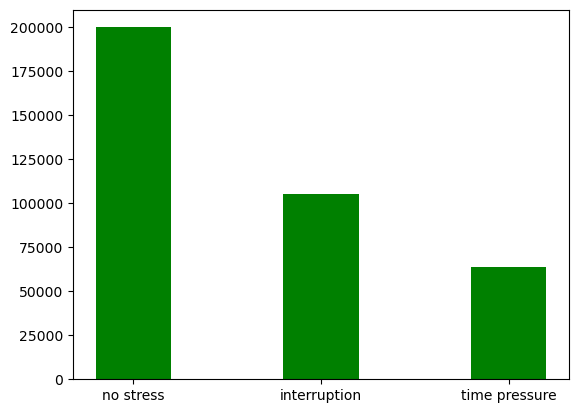

In [42]:
conditions = dict(train_data['condition'].value_counts())
labels = list(conditions.keys())
counts = list(conditions.values())
plt.bar(labels,counts, color ='green',
        width = 0.4)

In [43]:
train_data['condition'] = train_data['condition'].replace({
    'no stress': 0,      # no stress -> 0
    'interruption': 1,   # interruption -> 1
    'time pressure': 2   # time pressure -> 2
})

test_data['condition'] = test_data['condition'].replace({
    'no stress': 0,
    'interruption': 1,
    'time pressure': 2
})

C:\Users\sam\AppData\Local\Temp\ipykernel_19300\3948928397.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['condition'] = train_data['condition'].replace({
C:\Users\sam\AppData\Local\Temp\ipykernel_19300\3948928397.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['condition'] = test_data['condition'].replace({


In [44]:
print(train_data)

            MEAN_RR    MEDIAN_RR        SDRR      RMSSD       SDSD  \
0        885.157845   853.763730  140.972741  15.554505  15.553371   
1        939.425371   948.357865   81.317742  12.964439  12.964195   
2        898.186047   907.006860   84.497236  16.305279  16.305274   
3        881.757865   893.460030   90.370537  15.720468  15.720068   
4        809.625331   811.184865   62.766242  19.213819  19.213657   
...             ...          ...         ...        ...        ...   
369284   721.396910   721.533965   36.377559   9.609941   9.609936   
369285   984.266492   978.622945   74.918433  13.762274  13.761705   
369286  1025.499743  1024.968400   95.309200  23.051254  23.050395   
369287   798.123167   803.559610   78.449897  16.736686  16.736657   
369288   814.428911   815.178790   67.697387  20.649551  20.649546   

        SDRR_RMSSD         HR      pNN25     pNN50        SD1  ...         HF  \
0         9.063146  69.499952  11.133333  0.533333  11.001565  ...  15.522603 

In [46]:
print(train_data['condition'].unique())
# Count the occurrences of each unique value in the 'condition' column
condition_counts = train_data['condition'].value_counts()

print(condition_counts)


[0 1 2]
condition
0    200082
1    105150
2     64057
Name: count, dtype: int64


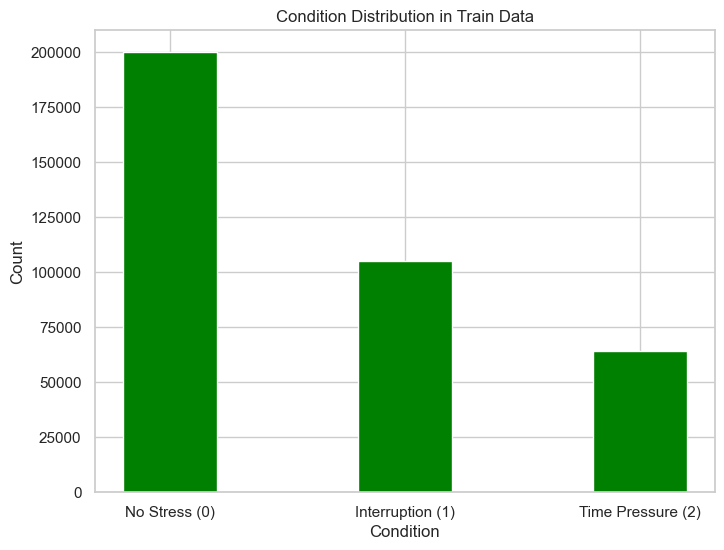

In [52]:
import matplotlib.pyplot as plt

# Create a bar chart for condition counts
conditions = dict(train_data['condition'].value_counts())
labels = ['No Stress (0)', 'Interruption (1)', 'Time Pressure (2)']
counts = list(conditions.values())

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color='green', width=0.4)

# Add titles and labels
plt.title('Condition Distribution in Train Data')
plt.xlabel('Condition')
plt.ylabel('Count')

# Display the bar chart
plt.show()


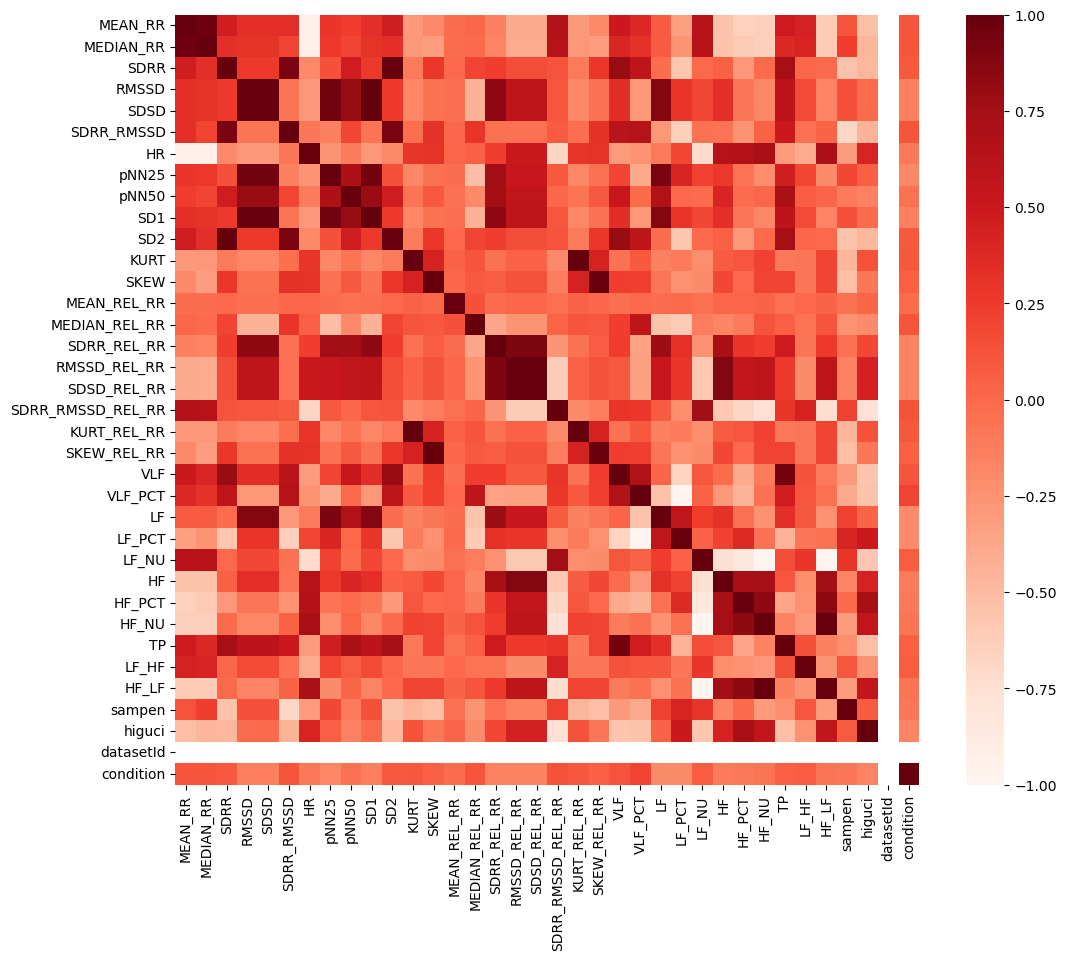

In [110]:
plt.figure(figsize=(12,10))
corr = train_data.corr()
sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)
plt.show()

In [22]:
import pandas as pd
corr = train_data.corr()

def feature_selection(correlation, threshold):
    selected_features = []
    for i in range(correlation.shape[0]):
        # Check if the correlation in column 35 is above the threshold
        if correlation.iloc[i, 35] > threshold:
            selected_features.append(train_data.columns[i])  # Store column name instead of the data itself
    return train_data[selected_features]  # Directly select columns from train_data

# Set the threshold and run the function
CORRELATION_THRESHOLD = 0.1
reduced_train = feature_selection(corr, CORRELATION_THRESHOLD)
reduced_train


,MEAN_RR,MEDIAN_RR,SDRR_RMSSD,MEDIAN_REL_RR,SDRR_RMSSD_REL_RR,VLF,VLF_PCT,condition
0,885.157845,853.763730,9.063146,-0.000179,2.143342,2661.894136,72.203287,1
1,939.425371,948.357865,6.272369,0.000611,2.930855,2314.265450,76.975728,0
2,898.186047,907.006860,5.182201,-0.000263,2.127053,1373.887112,51.152225,0
3,881.757865,893.460030,5.748591,0.000494,2.050988,2410.357408,70.180308,1
4,809.625331,811.184865,3.266724,-0.002736,1.816544,1151.177330,43.918366,1
...,...,...,...,...,...,...,...,...
369284,721.396910,721.533965,3.785409,0.000083,1.529068,298.009244,45.893349,1
369285,984.266492,978.622945,5.443754,0.000046,2.218313,1558.597883,68.405858,1
369286,1025.499743,1024.968400,4.134664,-0.002236,2.391601,1950.393956,45.030641,1
369287,798.123167,803.559610,4.687302,-0.001354,1.894304,1606.291482,54.821185,1


In [48]:

selected_features = ['SDRR_RMSSD', 'SDRR_RMSSD_REL_RR','condition']
reduced_train_selected = reduced_train[selected_features]
reduced_train_selected.to_csv('reduced_train_selected.csv', index=False)


C:\Users\sam\AppData\Local\Temp\ipykernel_19300\1027888426.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=reduced_train_selected, x='condition', y='SDRR_RMSSD', palette='deep')


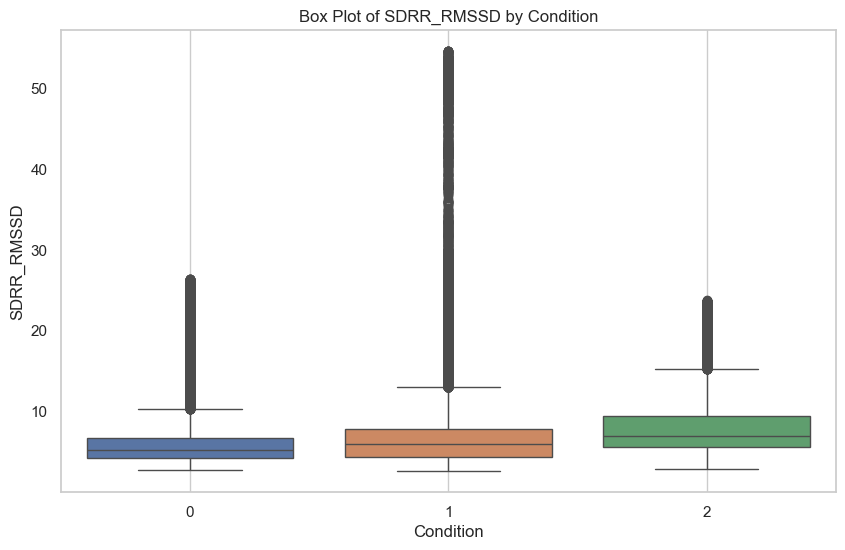

C:\Users\sam\AppData\Local\Temp\ipykernel_19300\1027888426.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=reduced_train_selected, x='condition', y='SDRR_RMSSD_REL_RR', palette='deep')


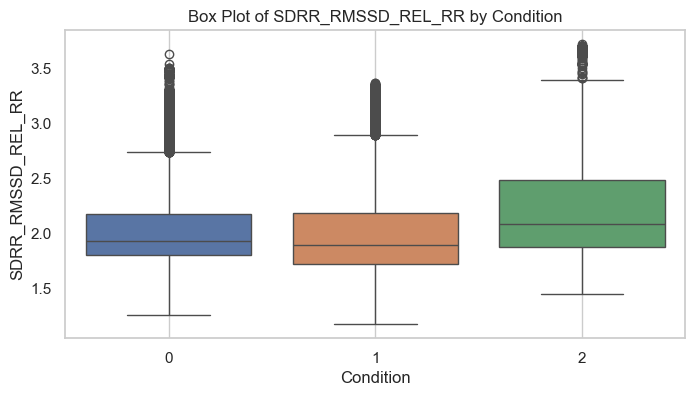

In [60]:
# Create a box plot for SDRR_RMSSD
plt.figure(figsize=(10, 6))
sns.boxplot(data=reduced_train_selected, x='condition', y='SDRR_RMSSD', palette='deep')
plt.title('Box Plot of SDRR_RMSSD by Condition')
plt.xlabel('Condition')
plt.ylabel('SDRR_RMSSD')
plt.grid()
plt.show()

# Create a box plot for SDRR_RMSSD_REL_RR
plt.figure(figsize=(8, 4))
sns.boxplot(data=reduced_train_selected, x='condition', y='SDRR_RMSSD_REL_RR', palette='deep')
plt.title('Box Plot of SDRR_RMSSD_REL_RR by Condition')
plt.xlabel('Condition')
plt.ylabel('SDRR_RMSSD_REL_RR')
plt.grid()
plt.show()


In [64]:
hrv_stress_data = pd.read_csv("C:/Users/sam/CODEs/t4/hrv_stress_data.csv")
combined_data = pd.read_csv('C:/Users/sam/CODEs/t4/notebook/reduced_train_selected.csv')
print(hrv_stress_data.head())
print(combined_data.head())

       RMSSD       SDNN  condition
0  31.575893  23.522104          0
1  31.217815  27.676007          0
2  29.334901  26.983305          1
3  34.888455  24.671232          0
4  38.836114  29.538552          0
   SDRR_RMSSD  SDRR_RMSSD_REL_RR  condition
0    9.063146           2.143342          1
1    6.272369           2.930855          0
2    5.182201           2.127053          0
3    5.748591           2.050988          1
4    3.266724           1.816544          1
